In [68]:
import warnings

warnings.filterwarnings('ignore')

In [69]:
import pandas as pd

In [70]:
df=pd.read_csv("day.csv")

In [71]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [72]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [73]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [75]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [76]:
df["season"]=df["season"].replace(1,"spring")
df["season"]=df["season"].replace(2,"summer")
df["season"]=df["season"].replace(3,"fall")
df["season"]=df["season"].replace(4,"winter")

In [77]:
df["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [78]:
df["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [79]:
df["yr"].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [80]:
def object_map(x):
    return x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [81]:
df[["mnth"]]=df[["mnth"]].apply(object_map)

In [82]:
df["mnth"].value_counts()

Dec    62
Mar    62
Oct    62
May    62
Aug    62
Jul    62
Jan    62
Sep    60
Apr    60
Nov    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [83]:
df["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [84]:
df["weekday"].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [85]:
def str_map(x):
    return x.map({1:"wed",2:"thur",3:"Fri",4:"Sat",5:"Sun",6:"Mon",0:"tues"})

In [86]:
df[["weekday"]]=df[["weekday"]].apply(str_map)

In [87]:
df["weekday"].value_counts()

wed     105
tues    105
Mon     105
Sat     104
Sun     104
thur    104
Fri     103
Name: weekday, dtype: int64

In [88]:
df["workingday"].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [89]:
df["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [90]:
df.loc[(df["weathersit"]==1),"weathersit"]="A"
df.loc[(df["weathersit"]==2),"weathersit"]="B"
df.loc[(df["weathersit"]==3),"weathersit"]="C"
df.loc[(df["weathersit"]==4),"weathersit"]="D"

In [91]:
df["weathersit"].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

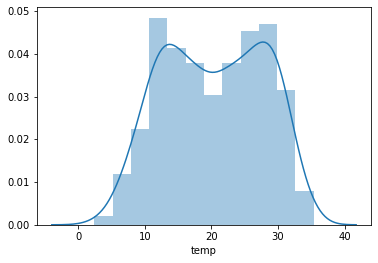

In [94]:
sns.distplot(df["temp"])
plt.show()

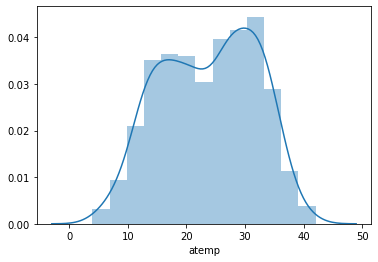

In [95]:
_=sns.distplot(df["atemp"])

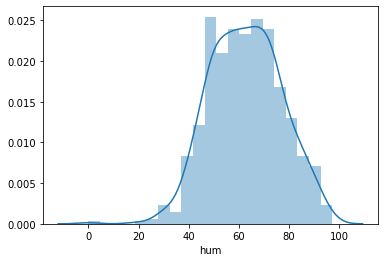

In [96]:
_=sns.distplot(df["hum"])

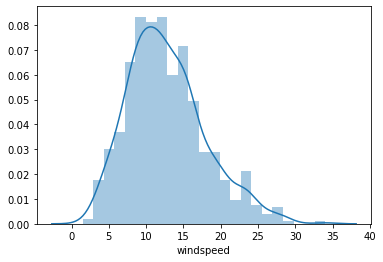

In [97]:
_=sns.distplot(df["windspeed"])

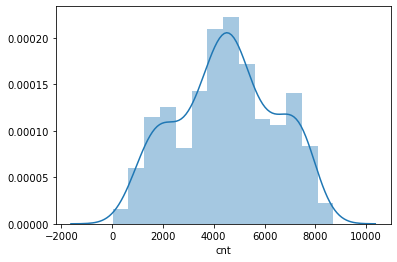

In [98]:
_=sns.distplot(df["cnt"])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [100]:
df["dteday"]=pd.to_datetime(df["dteday"])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [102]:
df_categorical=df.select_dtypes("object")

In [103]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


In [104]:
df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,tues,B
2,spring,Jan,wed,A
3,spring,Jan,thur,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Sat,B
726,spring,Dec,Sun,B
727,spring,Dec,Mon,B
728,spring,Dec,tues,A


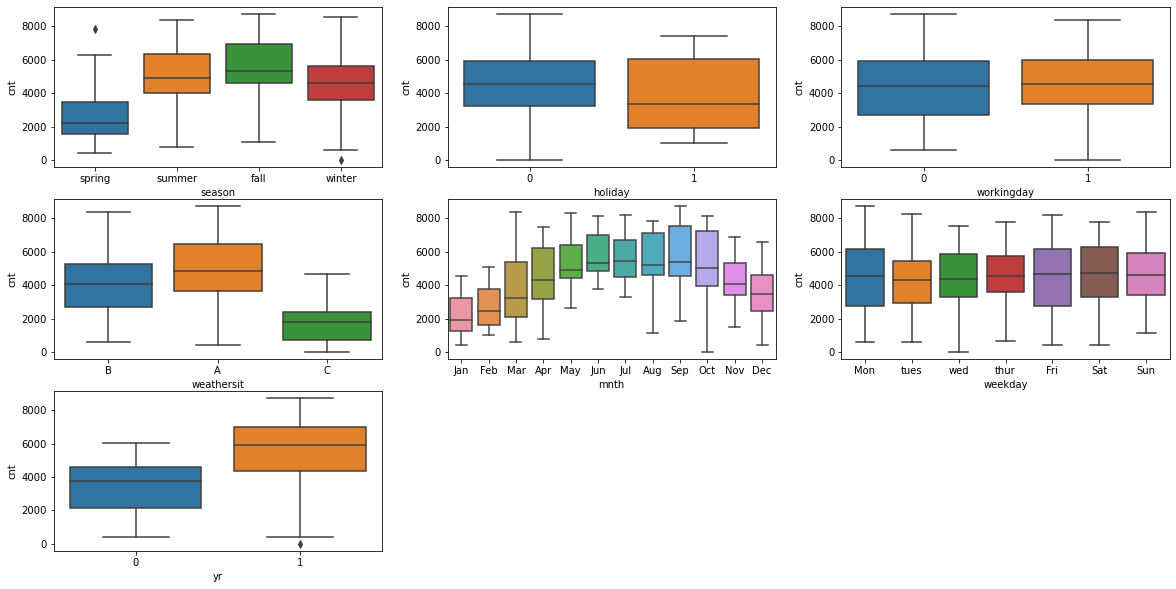

In [105]:
plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
sns.boxplot(x="season",y="cnt",data=df)

plt.subplot(3,3,2)
sns.boxplot(x="holiday",y="cnt",data=df)

plt.subplot(3,3,3)
sns.boxplot(x="workingday",y="cnt",data=df)

plt.subplot(3,3,4)
sns.boxplot(x="weathersit",y="cnt",data=df)

plt.subplot(3,3,5)
sns.boxplot(x="mnth",y="cnt",data=df)

plt.subplot(3,3,6)
sns.boxplot(x="weekday",y="cnt",data=df)

plt.subplot(3,3,7)
sns.boxplot(x="yr",y="cnt",data=df)

plt.show()

In [106]:
df_numeric=df.select_dtypes(include=["float64","int64"])

In [107]:
df_numeric.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [108]:
df_numeric=df_numeric.drop(['yr', 'holiday', 'workingday'],axis=1)

In [109]:
import numpy as np

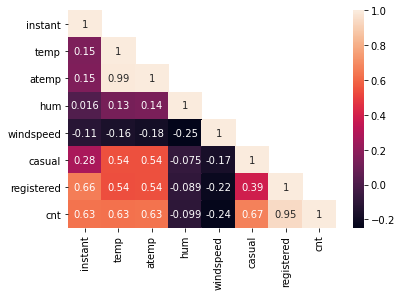

In [110]:
mask=np.array(df_numeric.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(df_numeric.corr(),mask=mask,annot=True)
plt.show()

In [111]:
df_numeric.drop(["atemp"],axis=1,inplace=True)

In [112]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   temp        730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 40.0 KB


In [113]:
df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,tues,B
2,spring,Jan,wed,A
3,spring,Jan,thur,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Sat,B
726,spring,Dec,Sun,B
727,spring,Dec,Mon,B
728,spring,Dec,tues,A


In [114]:
df_dummies=pd.get_dummies(df_categorical,drop_first=True)

In [115]:
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_thur,weekday_tues,weekday_wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df=df.drop(list(df_categorical.columns),axis=1)

In [117]:
df=pd.concat([df,df_dummies],axis=1)

In [118]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_thur,weekday_tues,weekday_wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        730 non-null    int64         
 1   dteday         730 non-null    datetime64[ns]
 2   yr             730 non-null    int64         
 3   holiday        730 non-null    int64         
 4   workingday     730 non-null    int64         
 5   temp           730 non-null    float64       
 6   atemp          730 non-null    float64       
 7   hum            730 non-null    float64       
 8   windspeed      730 non-null    float64       
 9   casual         730 non-null    int64         
 10  registered     730 non-null    int64         
 11  cnt            730 non-null    int64         
 12  season_spring  730 non-null    uint8         
 13  season_summer  730 non-null    uint8         
 14  season_winter  730 non-null    uint8         
 15  mnth_Aug       730 non-

In [120]:
df.drop(["dteday"],axis=1,inplace=True)

In [121]:
df.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_thur,weekday_tues,weekday_wed,weathersit_B,weathersit_C
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,1,0
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,1,0
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [122]:
X=df.drop(["cnt"],axis=1)
y=df["cnt"]

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scaler=MinMaxScaler()

In [127]:
X_train[['temp','hum','windspeed','casual','registered']]=scaler.fit_transform(X_train[['temp','hum','windspeed','casual','registered']])

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

In [129]:
model=GradientBoostingRegressor()

In [130]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [131]:
model.score(X_train,y_train)

0.9990695710988964